#Vector Regression

###Load and Explore the dataset

In [9]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [10]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [12]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


###Drop

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


##Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

##Flatten y for SVR

In [17]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [18]:
y_scaled=y_scaled.ravel()

In [19]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

##Train SVR Model(RBF Kernel)

In [20]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

###Predictions and Inverse Scaling

In [21]:
y_pred_scaled=svr.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

##Visualization:Actual vs Predicted

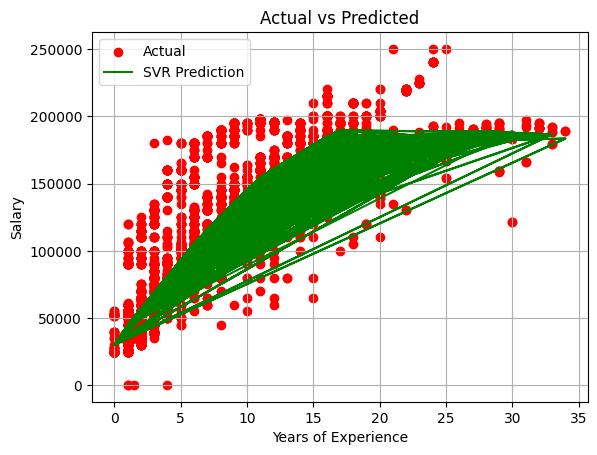

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='green',label='SVR Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

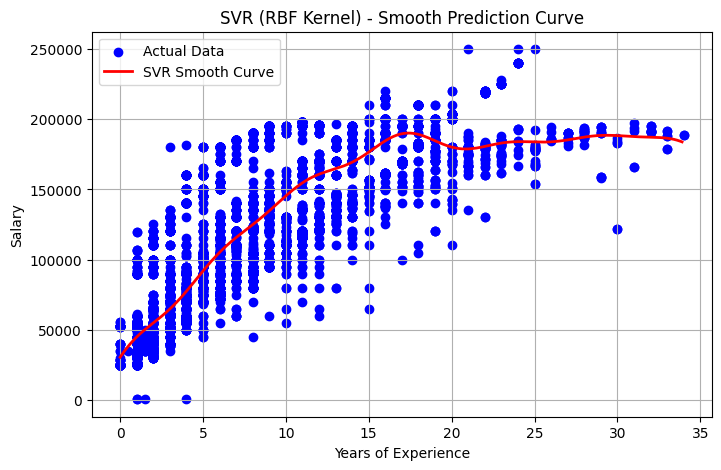

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a fine grid between min and max YearsExperience
x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1, 1)

# Scale X_grid just like training data
X_grid_scaled = sc_x.transform(x_grid)

# Predict on the grid and inverse transform the results
y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_grid, y_grid, color='red', label='SVR Smooth Curve', linewidth=2)
plt.title("SVR (RBF Kernel) - Smooth Prediction Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()


###Evaluate model performance

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)

print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)


Mean Squared Error: 759013901.8514212
Root Mean Squared Error: 27550.20692937571
R-squared: 0.7275580175081495


###Compare kernels using code

kernel:RBF | R^2 score:0.7249


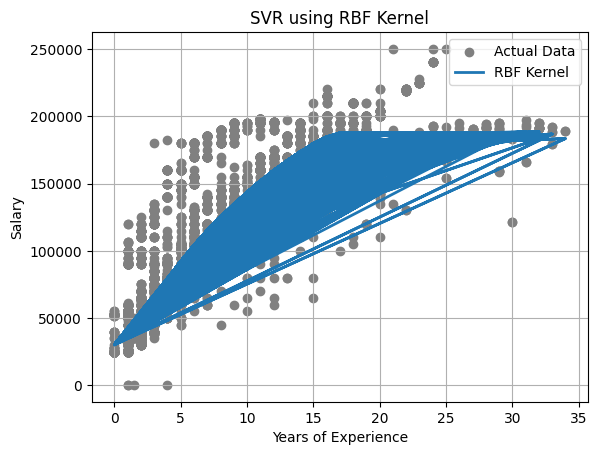

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#Load and Scale data
x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y).ravel()

#Define kernels
kernels=['linear','poly','rbf']

#Train and evaluate each kernel
for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
  else:
    model=SVR(kernel=kernel)
  model.fit(x_scaled,y_scaled)

#Predict for training data
y_pred_scaled=model.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))


#Evaluation
score=r2_score(y,y_pred)
print(f"kernel:{kernel.upper()} | R^2 score:{score:.4f}")

#plot
plt.scatter(x, y, color='gray', label='Actual Data')
plt.plot(x, y_pred, label=f'{kernel.upper()} Kernel', linewidth=2)
plt.title(f'SVR using {kernel.upper()} Kernel')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()


##Deep dive:Understanding C and epilson in SVR

In [26]:
SVR(C=1)
SVR(C=100)

SVR(C=100)

###Epilson-intensive margin

In [27]:
SVR(epsilon=0.1)
SVR(epsilon=1.0)

SVR(epsilon=1.0)

###Using different C and elpsilon values

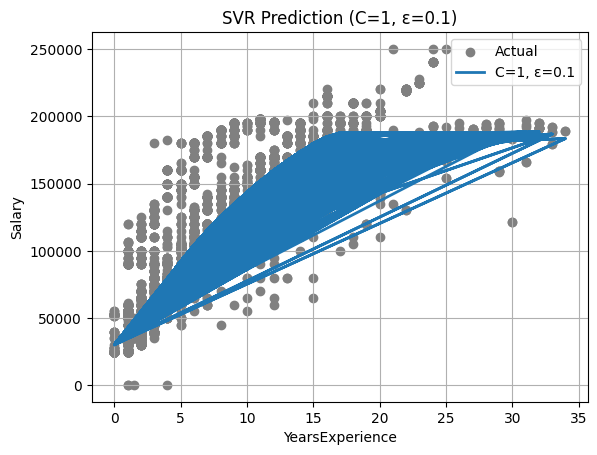

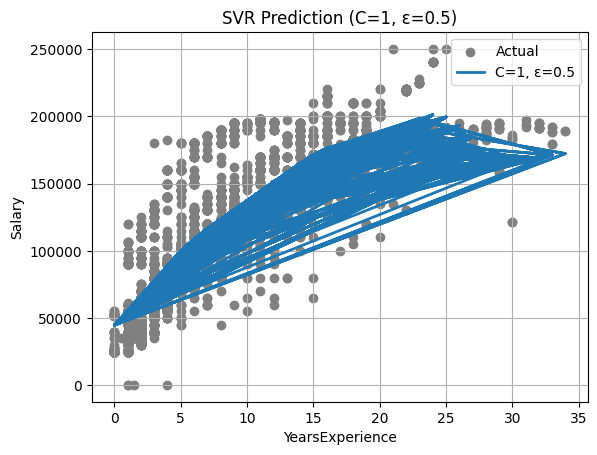

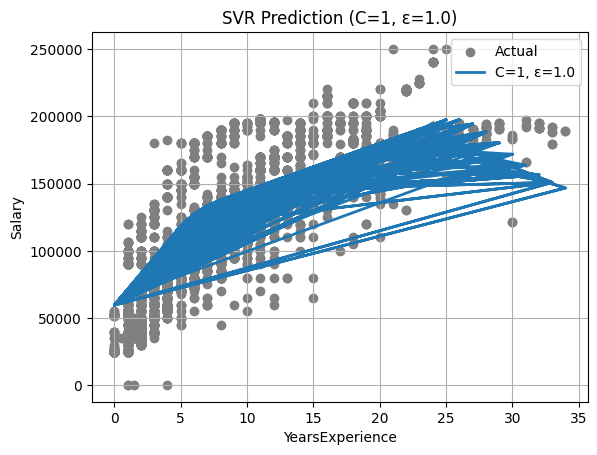

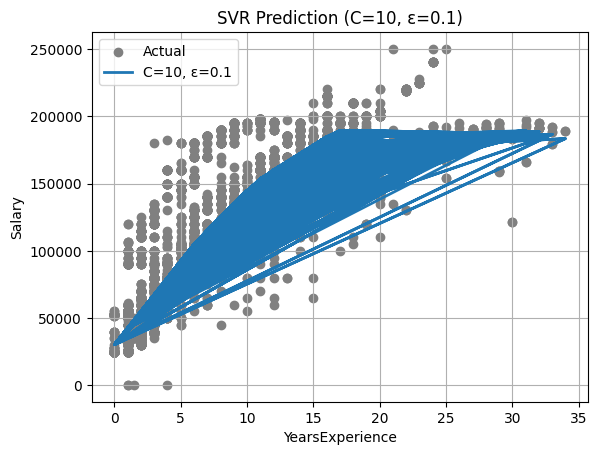

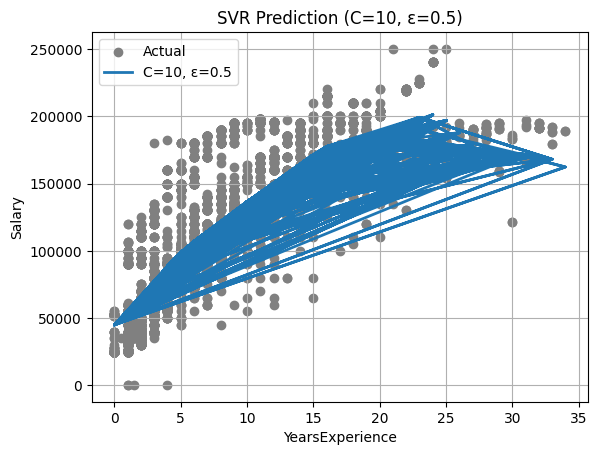

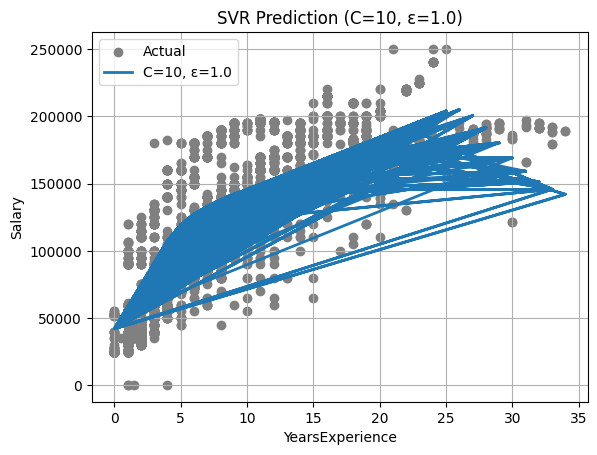

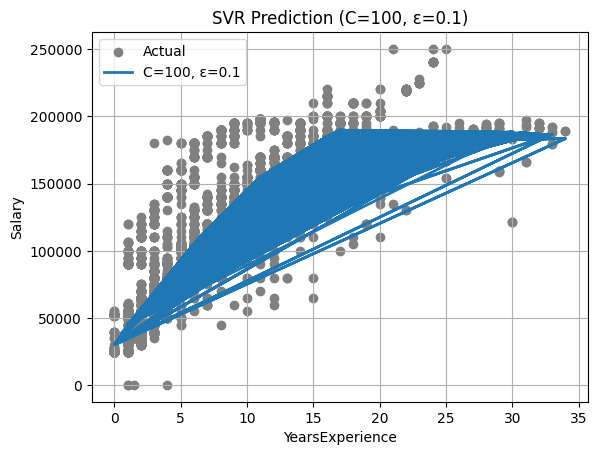

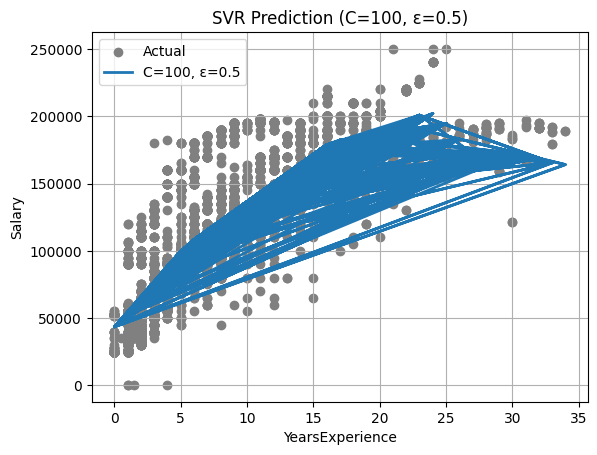

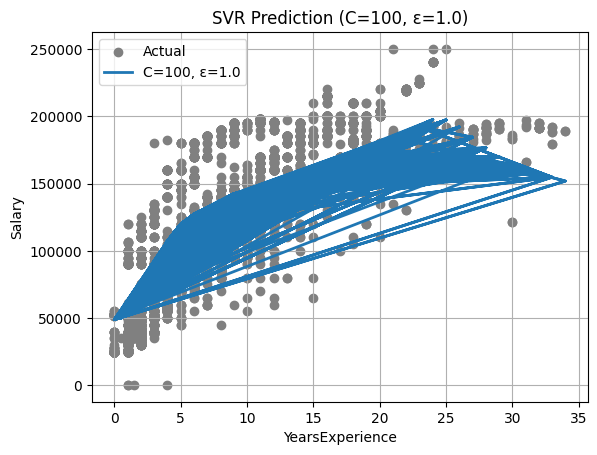

In [28]:
C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]

for c in C_values:
    for eps in epsilon_values:
        model = SVR(kernel='rbf', C=c, epsilon=eps)
        model.fit(x_scaled, y_scaled)
        y_pred = sc_y.inverse_transform(model.predict(x_scaled).reshape(-1, 1))

        plt.scatter(x, y, color='gray', label='Actual')
        plt.plot(x, y_pred, label=f'C={c}, ε={eps}', linewidth=2)
        plt.title(f'SVR Prediction (C={c}, ε={eps})')
        plt.xlabel("YearsExperience")
        plt.ylabel("Salary")
        plt.legend()
        plt.grid(True)
        plt.show()

##Example

In [29]:
exp = [[6.5]]
exp_scaled = sc_x.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

print(f"Predicted Salary for 6.5 years: ₹{salary[0][0]:,.2f}")

Predicted Salary for 6.5 years: ₹110,694.67
